<a href="https://colab.research.google.com/github/shahnawazsyed/MAT422/blob/main/Unconstrained_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.3 Unconstrained Optimization**
* Necessary and sufficient conditions of local minimizers
* Convexity and global minimizers
* Gradient descent

*Note: sections 3.3.1 & 3.3.2 utilize gradient descent from 3.3.3 to demonstrate local and global minimizers. Gradient descent is explained fully in its own section*

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# **Necessary and sufficient conditions of local minimizers**

We are interested in unconstrained optimization of the form:

$\underset{x\in R^d}{min}f(x)$ where $f: R^d → R$

The point $x^*$ is a global minimizer of $f$ over $R^d$ if
$f(x) ≥ f(x^*)$ for all x in $R^d$

The point $x^*$ is a local minimizer of $f$ over $R^d$ if
$f(x) ≥ f(x^*), \forall x \in B_δ(x^*)\backslash{{x^*}}$

For a strict inequlity, we say $x^*$ is a strict local minimizer.

Descent direction: A vector v is a descent direction for $f$ at $x_0$ if there is a $α^*>0$ such that $f(x_0+αv)<f(x_0), ∀a∈(0,a^*)$

We can use gradient descent to find the local minimizer of a function.

In [44]:
def function(x):
    return x**2 + 4*np.sin(2*x)  #f(x) = x^2 + 4sin(2x)
def derivative(x):
    return 2*x + 8*np.cos(2*x)

In [60]:
def gradient_descent(derivative, start_x, learning_rate, tolerance=1e-6, max_iter=1000):
    x = start_x
    iteration = 0
    steps = [x]

    while iteration < max_iter:
        gradient = derivative(x)
        new_x = x - learning_rate * gradient

        if np.isclose(abs(new_x - x), tolerance):
            break

        x = new_x
        steps.append(x)
        iteration += 1

    return x, steps

In [61]:
local_min, steps = gradient_descent(derivative, 3, 0.01)
print(f"Local minimum occurs at x = {round(local_min, 3)}, y = {round(function(local_min), 3)}")

Local minimum occurs at x = 2.082, y = 0.921


We plot f(x) and highlight the local minimum.

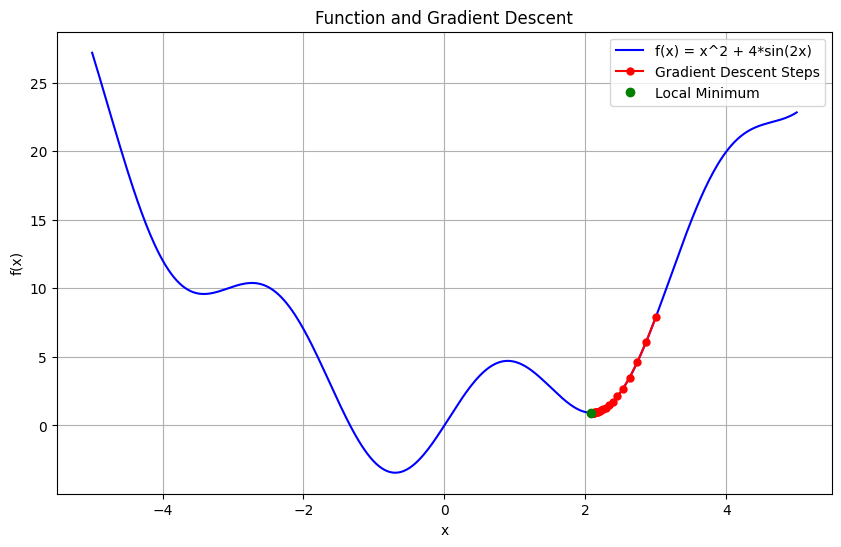

In [47]:
x_vals = np.linspace(-5, 5, 500)
y_vals = function(x_vals)
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x) = x^2 + 4*sin(2x)', color='blue')
step_x_vals = np.array(steps)
step_y_vals = function(step_x_vals)
plt.plot(step_x_vals, step_y_vals, 'ro-', label='Gradient Descent Steps', markersize=5)
plt.plot(local_min, function(local_min), 'go', label='Local Minimum')
plt.title('Local minimizer')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# **Convexity and Global Minimizers**

A function is convex if a line segment between two points on the graph of the function lies above the graph.

A function $f: R^d ⇒ R$ is convex if for all x, y in $R^d$ and all $α ∈ [0,1]$:

$f((1-\alpha)x+αy) ≤ (1-\alpha)f(x)+αf(y)$

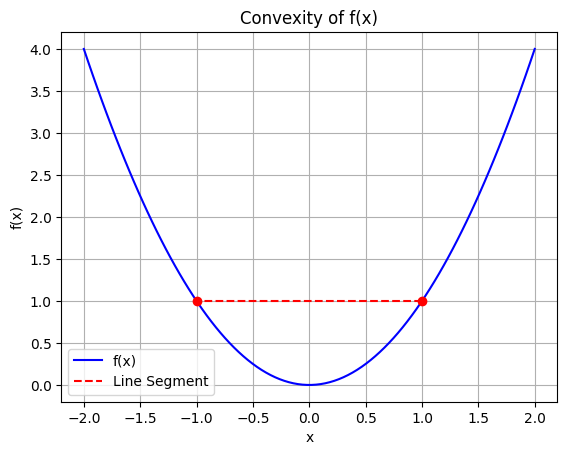

In [48]:
def f(x):
    return x ** 2

x = np.linspace(-2, 2, 100)
y = f(x)

x1, x2 = -1, 1
y1, y2 = f(x1), f(x2)

t = np.linspace(0, 1, 100)
convex_combination = t * x1 + (1 - t) * x2
line_values = t * y1 + (1 - t) * y2

plt.plot(x, y, label='f(x)', color='blue')
plt.plot(convex_combination, line_values, 'r--', label='Line Segment')
plt.scatter([x1, x2], [y1, y2], color='red', zorder=5)
plt.title('Convexity of f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

For convex functions, minimizers must satisfy $Δf(x_0)=0$. In a convex function, any local minimizer is also a global minimizer.

In [49]:
def f_prime(x):
    return 2*x

In [56]:
local_min, steps = gradient_descent(f_prime, 5, 0.01)
print(f"Global minimum occurs at x = {round(local_min, 2)}, y = {round(f(local_min), 0)}")

Global minimum occurs at x = 0.0, y = 0.0


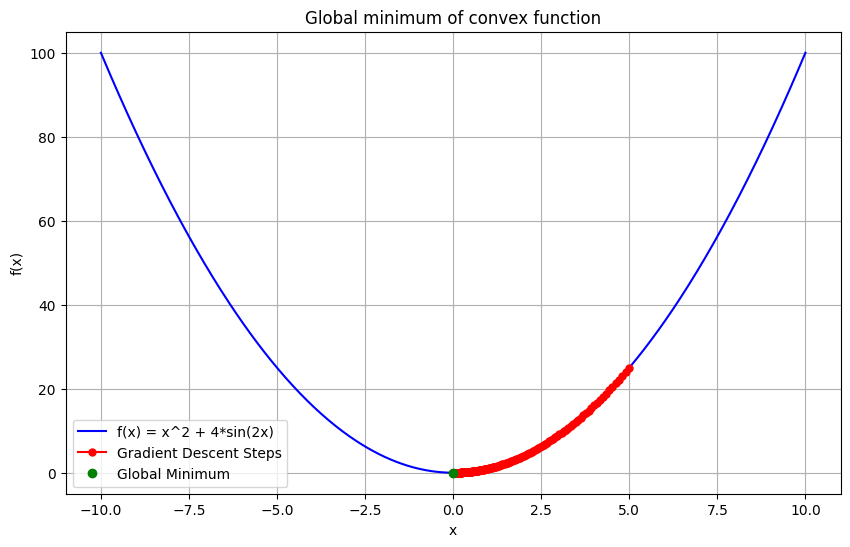

In [57]:
x_vals = np.linspace(-10, 10, 500)
y_vals = f(x_vals)
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x) = x^2 + 4*sin(2x)', color='blue')
step_x_vals = np.array(steps)
step_y_vals = f(step_x_vals)
plt.plot(step_x_vals, step_y_vals, 'ro-', label='Gradient Descent Steps', markersize=5)
plt.plot(local_min, f(local_min), 'go', label='Global Minimum')
plt.title('Global minimum of convex function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# **Gradient Descent**

Gradient descent is an interative algorithm to find a local minimum of a differentiable function.

The gradient descent function starts at *start_x* and computes the gradient of the function at each x in the direction opposite to the gradient (at the learning rate). This continues until $\Delta$x is smaller than *tolerance* or *max_iter* is reached. It returns the local minimizer and the trajectory of the descent steps.

In [ ]:
def gradient_descent(derivative, start_x, learning_rate, tolerance=1e-6, max_iter=1000):
    x = start_x
    iteration = 0
    steps = [x]

    while iteration < max_iter:
        gradient = derivative(x)
        new_x = x - learning_rate * gradient

        if np.isclose(abs(new_x - x), tolerance):
            break

        x = new_x
        steps.append(x)
        iteration += 1

    return x, steps

In [ ]:
local_min, steps = gradient_descent(derivative, 3, 0.01)
print(f"Local minimum occurs at x = {round(local_min, 3)}, y = {round(function(local_min), 3)}")

Local minimum occurs at x = 2.082, y = 0.921


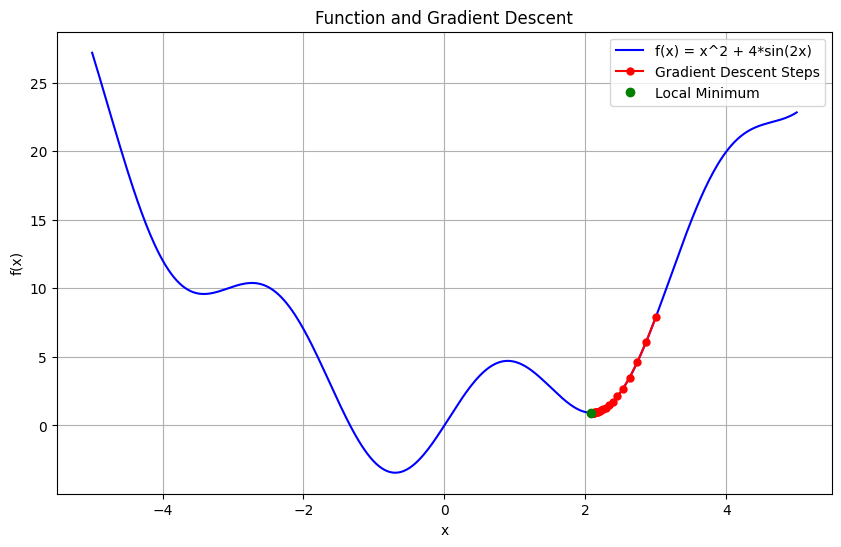

In [ ]:
x_vals = np.linspace(-5, 5, 500)
y_vals = function(x_vals)
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x) = x^2 + 4*sin(2x)', color='blue')
step_x_vals = np.array(steps)
step_y_vals = function(step_x_vals)
plt.plot(step_x_vals, step_y_vals, 'ro-', label='Gradient Descent Steps', markersize=5)
plt.plot(local_min, function(local_min), 'go', label='Local Minimum')
plt.title('Function and Gradient Descent')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()